In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, auc, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, mean_squared_error, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from pycaret.classification import *
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode,iplot
import plotly as py
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
init_notebook_mode(connected=True)

init_notebook_mode(connected=True)
cf.go_offline()

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv",header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
data= df.copy()

In [5]:
data.columns=(['age','gender','Total_Bilirubin','Direct_Bilirubin',
                                              'Alkaline_Phosphotase','Alanine_Aminotransferase',
                                              'Aspartate_Aminotransferase','Total_Protiens','Albumin',
                                              'Albumin_and_Globulin_Ratio','outcome'])

In [6]:
data.head()

,age,gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,outcome
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         583 non-null    int64  
 1   gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alanine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  outcome                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
px.bar(data["outcome"].value_counts())

In [9]:
data['gender'].replace('Female', 0, inplace=True)
data['gender'].replace('Male', 1, inplace=True)

In [10]:
data.head()

,age,gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,outcome
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<AxesSubplot:>

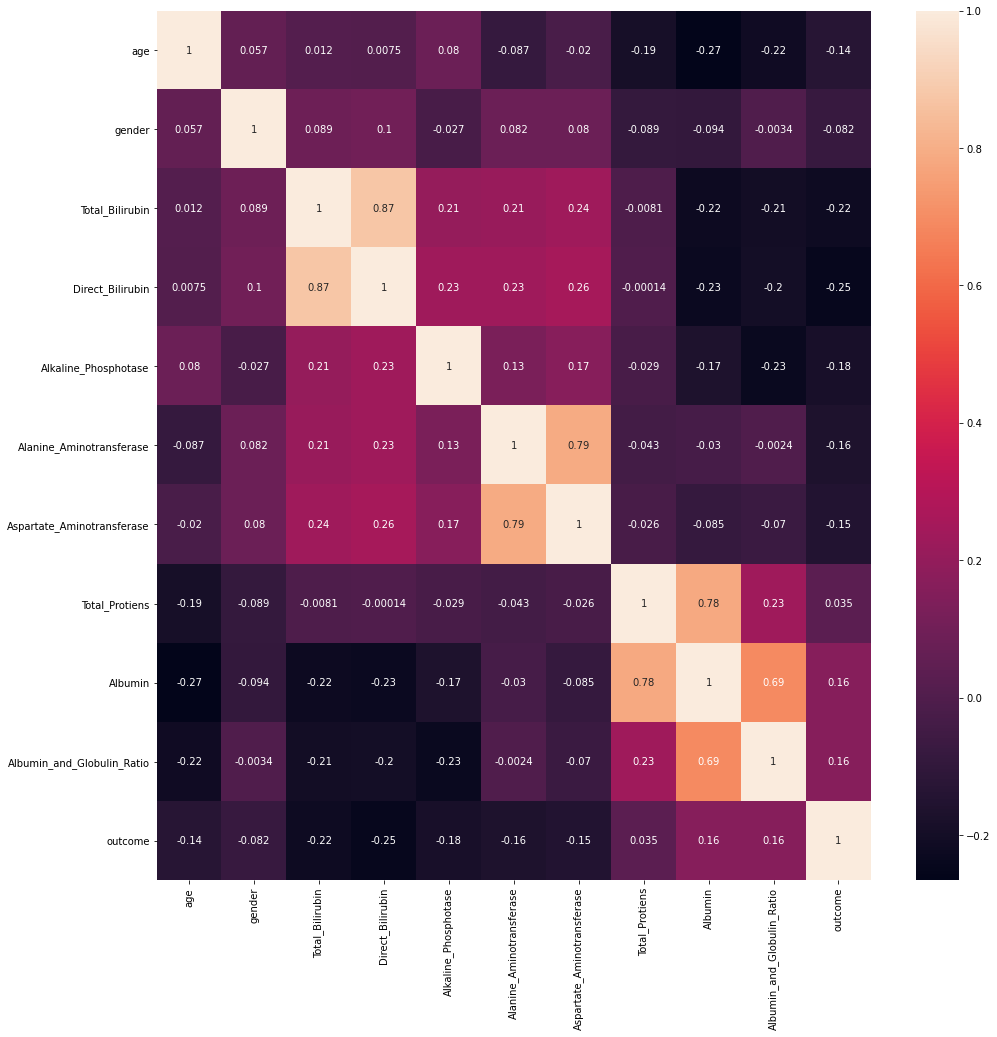

In [11]:
fig=plt.figure(figsize=(16,16))
sns.heatmap(data.corr(), annot=True)

In [12]:
data.columns

Index(['age', 'gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alanine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'outcome'],
      dtype='object')

In [13]:
data['gender'].value_counts()

1    441
0    142
Name: gender, dtype: int64

In [14]:
data['outcome'].value_counts()

1    416
2    167
Name: outcome, dtype: int64

In [15]:
data.isnull().sum()

age                           0
gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
outcome                       0
dtype: int64

In [16]:
data['Albumin_and_Globulin_Ratio']=data['Albumin_and_Globulin_Ratio'].ffill()

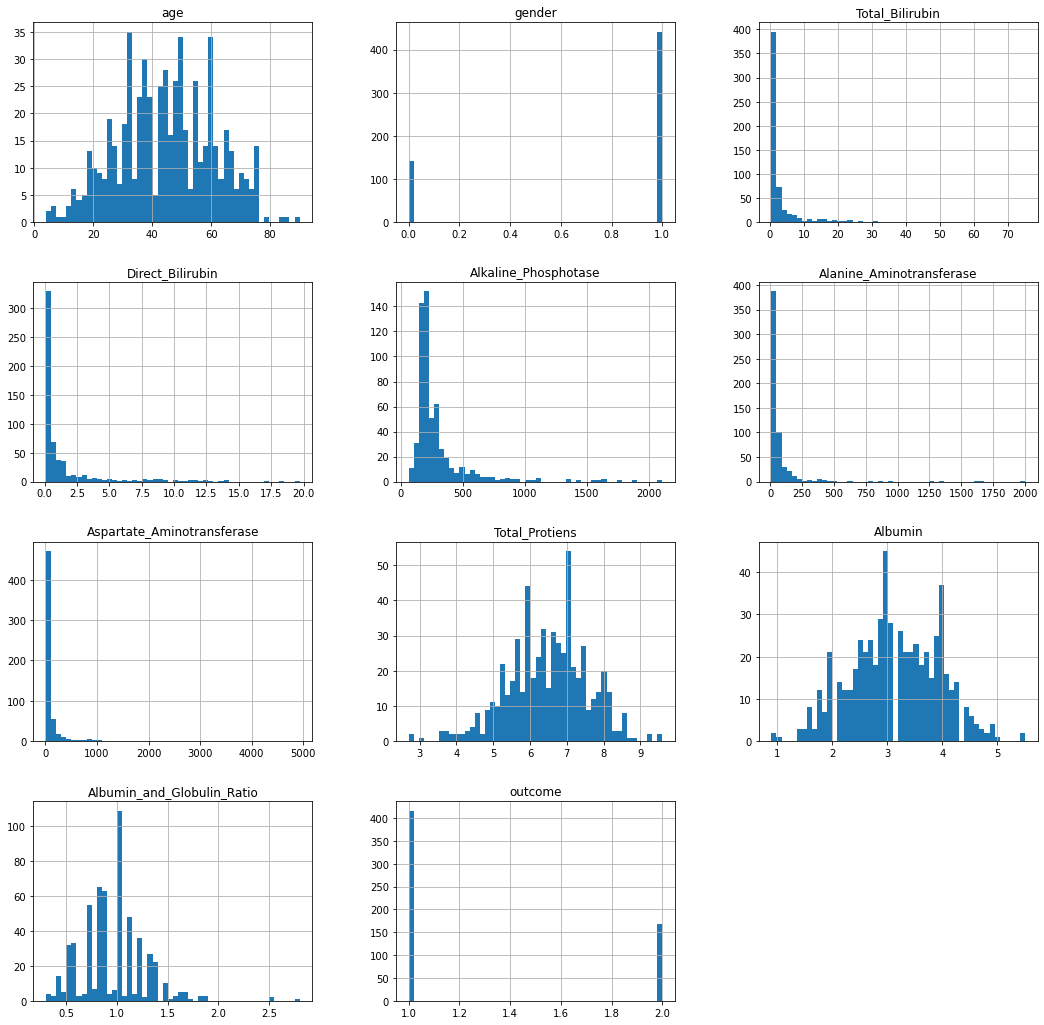

In [17]:
_=data.hist(bins=50, figsize=(18,18))

age
-0.0293096531748283


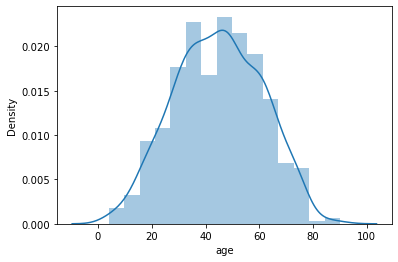

gender
-1.194834410146238


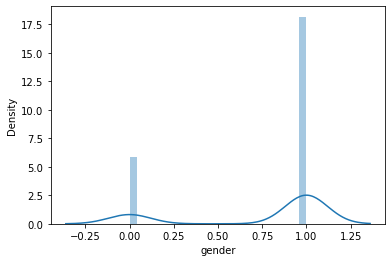

Total_Bilirubin
4.8948385248878825


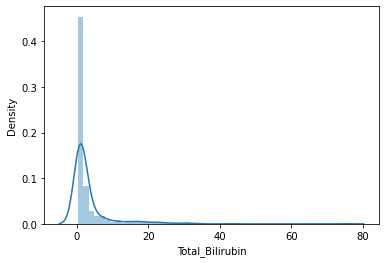

Direct_Bilirubin
3.2041317604378037


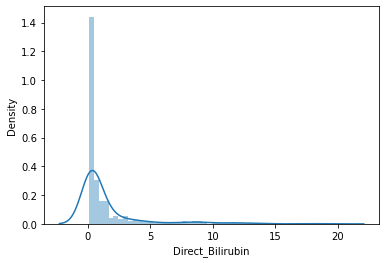

Alkaline_Phosphotase
3.755412227842381


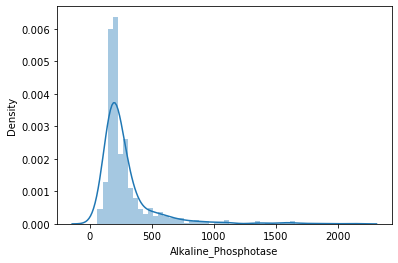

Alanine_Aminotransferase
6.532329464026143


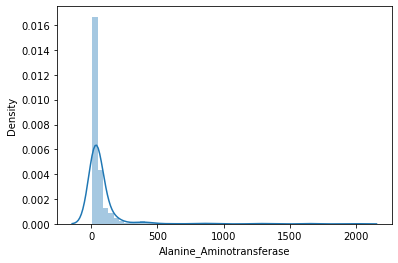

Aspartate_Aminotransferase
10.519023554210735


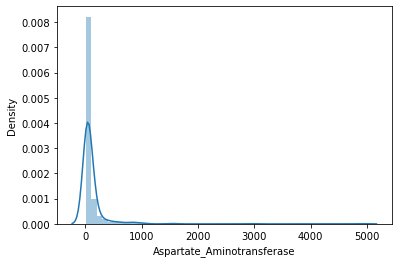

Total_Protiens
-0.28493665487447245


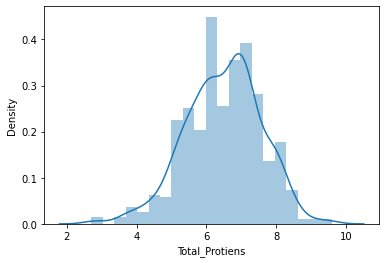

Albumin
-0.043572251735588034


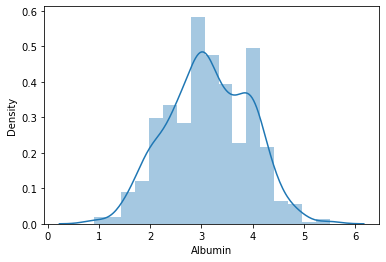

Albumin_and_Globulin_Ratio
0.989593176250169


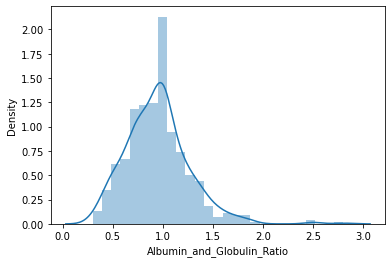

outcome
0.9447011547384523


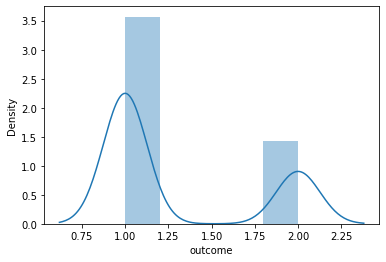

In [18]:
for col in data:
    print(col)
    print(skew(data[col]))
    
    plt.figure()
    sns.distplot(data[col])
    plt.show()

In [19]:
data1=data.copy()

In [20]:
target= data1['outcome']
data1.drop(['outcome'],axis=1,inplace=True)

In [21]:
data1.head()

,age,gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [22]:
a=data1
b=target

In [23]:
bestfeature= SelectKBest(score_func=chi2,k='all')
fit=(bestfeature.fit(a,b))

In [24]:
DataScores=pd.DataFrame(fit.scores_)
DataColumns=pd.DataFrame(a.columns)

In [25]:
featureScores=pd.concat([DataColumns,DataScores],axis=1)
featureScores.columns=['Features Name','Score']

In [26]:
featureScores= featureScores.sort_values(by='Score', ascending=False)
featureScores

,Features Name,Score
6,Aspartate_Aminotransferase,10203.328978
5,Alanine_Aminotransferase,6421.919946
4,Alkaline_Phosphotase,4039.855702
2,Total_Bilirubin,329.873827
3,Direct_Bilirubin,187.005784
0,age,64.315174
8,Albumin,3.053371
9,Albumin_and_Globulin_Ratio,1.693056
1,gender,0.964518
7,Total_Protiens,0.129627


In [27]:
model=RandomForestClassifier()
model.fit(a,b)

RandomForestClassifier()

In [28]:
model.feature_importances_

array([0.12745545, 0.01939208, 0.10766079, 0.08044101, 0.14996154,
       0.13148823, 0.13122435, 0.08519969, 0.08771702, 0.07945984])

In [29]:
feat_importances=pd.Series(model.feature_importances_,index=a.columns)

In [30]:
feat_importances.nlargest(20).iplot(kind='scatter',
                 title='On basis of ExtraTreesClassifier Visualize feature importance')

In [31]:
data2 = pd.DataFrame(data1, columns=['age','Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphotase',
                                     'Alanine_Aminotransferase','Aspartate_Aminotransferase','Albumin'])

In [32]:
data2.head()

,age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Albumin
0,65,0.7,0.1,187,16,18,3.3
1,62,10.9,5.5,699,64,100,3.2
2,62,7.3,4.1,490,60,68,3.3
3,58,1.0,0.4,182,14,20,3.4
4,72,3.9,2.0,195,27,59,2.4


In [33]:
data3=data2.copy()

In [34]:
Scaler=StandardScaler()
Scaler.fit(data3)

StandardScaler()

In [35]:
 data3=pd.DataFrame(Scaler.transform(data3),index=data3.index,columns=data3.columns)

In [36]:
data3.head()

,age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Albumin
0,1.252098,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.198969
1,1.066637,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.073157
2,1.066637,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.198969
3,0.819356,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.324781
4,1.684839,0.096902,0.183135,-0.393756,-0.294379,-0.176363,-0.933340


In [37]:
x= data3
y= target

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [39]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((408, 7), (175, 7), (408,), (175,))

In [40]:
rf = RandomForestClassifier()

In [41]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
y_prediction = rf.predict(x_test)

In [43]:
print(confusion_matrix(y_test, y_prediction))
print("*"*20)
print(classification_report(y_test, y_prediction))

[[111  17]
 [ 29  18]]
********************
              precision    recall  f1-score   support

           1       0.79      0.87      0.83       128
           2       0.51      0.38      0.44        47

    accuracy                           0.74       175
   macro avg       0.65      0.63      0.63       175
weighted avg       0.72      0.74      0.72       175



In [44]:
smote=SMOTE(sampling_strategy="minority")
x_sm, y_sm=smote.fit_sample(x,y)
y_sm.value_counts()

2    416
1    416
Name: outcome, dtype: int64

In [45]:
px.bar(y_sm.value_counts(), color=y_sm.unique(), height=400, width=400)

age
0.05673000894268439


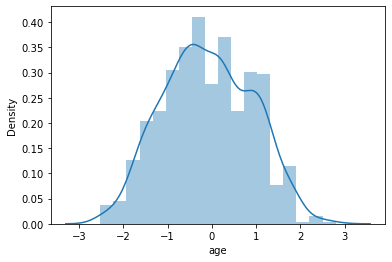

Total_Bilirubin
5.809740831564766


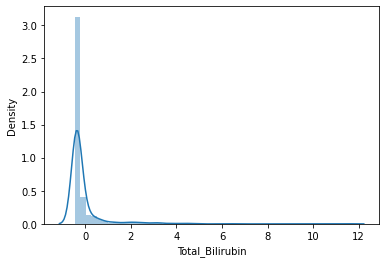

Direct_Bilirubin
3.8976384341586874


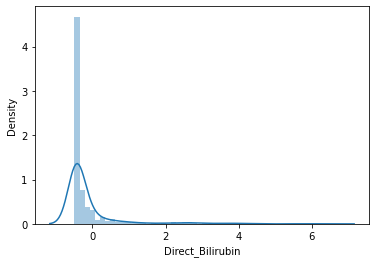

Alkaline_Phosphotase
4.315889683056711


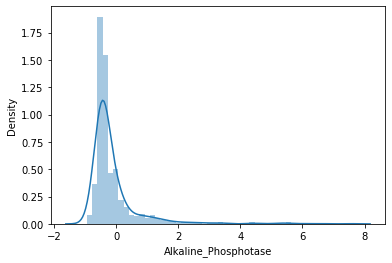

Alanine_Aminotransferase
7.793178379079573


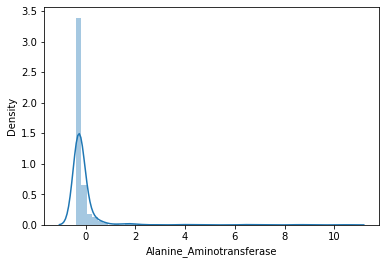

Aspartate_Aminotransferase
12.420306187310073


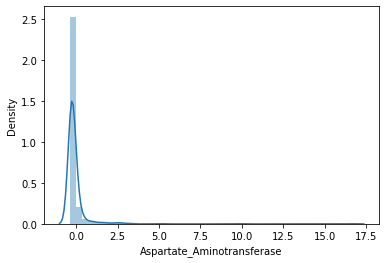

Albumin
-0.13859324240351462


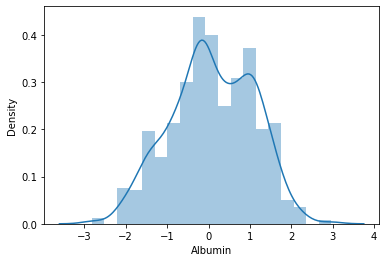

In [46]:
for col in x_sm:
    print(col)
    print(skew(x_sm[col]))
    
    plt.figure()
    sns.distplot(x_sm[col])
    plt.show()

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x_sm,y_sm, test_size=0.3, random_state=42, stratify=y_sm)

In [48]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
# Predicting the model
y_predict_rf = model_rf.predict(x_test)

In [50]:
print("Accuracy score = ",accuracy_score(y_test,y_predict_rf))
print("#"*20)
print("Confusion matrix \n",confusion_matrix(y_test,y_predict_rf))
print("#"*20)
print("Classification report \n",classification_report(y_test,y_predict_rf))

Accuracy score =  0.804
####################
Confusion matrix 
 [[ 92  33]
 [ 16 109]]
####################
Classification report 
               precision    recall  f1-score   support

           1       0.85      0.74      0.79       125
           2       0.77      0.87      0.82       125

    accuracy                           0.80       250
   macro avg       0.81      0.80      0.80       250
weighted avg       0.81      0.80      0.80       250



In [51]:
# x_train_AML = pd.DataFrame(x_train)
# y_train_AML = pd.DataFrame(y_train)

In [52]:
# setup(pd.concat([x_train_AML, y_train_AML], axis=1), target='outcome')

In [53]:
# compare_models()

In [54]:
models = {
    "catboost": CatBoostClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "ExtraTrees": ExtraTreesClassifier(),
    "Xgboost" : XGBClassifier(eval_metric='mlogloss'),
    "Lightgbm" : LGBMClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Logistic": LogisticRegression()
}

In [55]:
# Preprocessing, fitting, making predictions and scoring for every model:
# We used without tuning Algorithm,For prediction:
models_data = {'Accuracy':{},
               'Recall':{},
               'Precision':{},
               'F1 Score':{},
              'MSE':{}}

for name in models:
    model = models[name].fit(x_train, y_train)    
    y_pred = model.predict(x_test)
    
    #calculate the Accuracy of model with all algorithm
    AccuracyScore = accuracy_score(y_test,y_pred)
    models_data['Accuracy'][name]= AccuracyScore
        
    #calculate the RecallScore of model with all algorithm
    RecallScore = recall_score(y_test, y_pred)         
    models_data['Recall'][name] = RecallScore
               
    #calculate Precision Score of model with all algorithm
    PrecisionScore= precision_score(y_test, y_pred)
    models_data['Precision'][name]= PrecisionScore

    #calculate F1 Score of model with all algorithm    
    F1_Score = f1_score(y_test, y_pred)
    models_data['F1 Score'][name]= F1_Score
    
    #calculate Mean Squared Error of model with all algorithm    
    MSE_value = mean_squared_error(y_test, y_pred)
    models_data['MSE'][name]= MSE_value
        
    print('\n========================={}========================='.format(name))
    print('******************************************************')
    print('Accuracy    : ',AccuracyScore)
    print('Recall: ',RecallScore) 
    print('Precision    : ',PrecisionScore) 
    print('F1 Score    : ',F1_Score) 
    print('MSE   : ',MSE_value)   

Learning rate set to 0.008176
0:	learn: 0.6903983	total: 165ms	remaining: 2m 45s
1:	learn: 0.6872035	total: 172ms	remaining: 1m 25s
2:	learn: 0.6837245	total: 179ms	remaining: 59.5s
3:	learn: 0.6809885	total: 185ms	remaining: 46s
4:	learn: 0.6780973	total: 190ms	remaining: 37.9s
5:	learn: 0.6753095	total: 195ms	remaining: 32.4s
6:	learn: 0.6726596	total: 200ms	remaining: 28.4s
7:	learn: 0.6699266	total: 209ms	remaining: 25.9s
8:	learn: 0.6669160	total: 214ms	remaining: 23.5s
9:	learn: 0.6641515	total: 218ms	remaining: 21.6s
10:	learn: 0.6618410	total: 222ms	remaining: 19.9s
11:	learn: 0.6588714	total: 226ms	remaining: 18.6s
12:	learn: 0.6565603	total: 230ms	remaining: 17.4s
13:	learn: 0.6539848	total: 234ms	remaining: 16.5s
14:	learn: 0.6515151	total: 238ms	remaining: 15.6s
15:	learn: 0.6490901	total: 242ms	remaining: 14.9s
16:	learn: 0.6464068	total: 245ms	remaining: 14.2s
17:	learn: 0.6438778	total: 249ms	remaining: 13.6s
18:	learn: 0.6413879	total: 253ms	remaining: 13.1s
19:	learn: 

198:	learn: 0.4447650	total: 1.01s	remaining: 4.07s
199:	learn: 0.4441194	total: 1.01s	remaining: 4.06s
200:	learn: 0.4435520	total: 1.02s	remaining: 4.05s
201:	learn: 0.4427512	total: 1.02s	remaining: 4.04s
202:	learn: 0.4420596	total: 1.03s	remaining: 4.04s
203:	learn: 0.4414664	total: 1.03s	remaining: 4.03s
204:	learn: 0.4408697	total: 1.04s	remaining: 4.03s
205:	learn: 0.4404462	total: 1.04s	remaining: 4.02s
206:	learn: 0.4399064	total: 1.05s	remaining: 4.01s
207:	learn: 0.4390551	total: 1.05s	remaining: 4s
208:	learn: 0.4384221	total: 1.05s	remaining: 3.99s
209:	learn: 0.4379214	total: 1.06s	remaining: 3.98s
210:	learn: 0.4373637	total: 1.06s	remaining: 3.97s
211:	learn: 0.4366025	total: 1.06s	remaining: 3.96s
212:	learn: 0.4358522	total: 1.07s	remaining: 3.95s
213:	learn: 0.4350985	total: 1.07s	remaining: 3.94s
214:	learn: 0.4346590	total: 1.08s	remaining: 3.93s
215:	learn: 0.4339533	total: 1.08s	remaining: 3.92s
216:	learn: 0.4333246	total: 1.08s	remaining: 3.92s
217:	learn: 0.4

361:	learn: 0.3722305	total: 1.67s	remaining: 2.95s
362:	learn: 0.3717461	total: 1.68s	remaining: 2.94s
363:	learn: 0.3715190	total: 1.68s	remaining: 2.94s
364:	learn: 0.3711644	total: 1.69s	remaining: 2.93s
365:	learn: 0.3707818	total: 1.69s	remaining: 2.93s
366:	learn: 0.3705526	total: 1.7s	remaining: 2.92s
367:	learn: 0.3701029	total: 1.7s	remaining: 2.92s
368:	learn: 0.3697966	total: 1.7s	remaining: 2.91s
369:	learn: 0.3694805	total: 1.71s	remaining: 2.91s
370:	learn: 0.3690016	total: 1.71s	remaining: 2.9s
371:	learn: 0.3687040	total: 1.71s	remaining: 2.9s
372:	learn: 0.3682061	total: 1.72s	remaining: 2.89s
373:	learn: 0.3678687	total: 1.72s	remaining: 2.88s
374:	learn: 0.3674660	total: 1.73s	remaining: 2.88s
375:	learn: 0.3670083	total: 1.73s	remaining: 2.87s
376:	learn: 0.3667520	total: 1.73s	remaining: 2.87s
377:	learn: 0.3665686	total: 1.74s	remaining: 2.86s
378:	learn: 0.3661976	total: 1.74s	remaining: 2.85s
379:	learn: 0.3659994	total: 1.75s	remaining: 2.85s
380:	learn: 0.365

523:	learn: 0.3203289	total: 2.33s	remaining: 2.12s
524:	learn: 0.3201898	total: 2.34s	remaining: 2.12s
525:	learn: 0.3199149	total: 2.34s	remaining: 2.11s
526:	learn: 0.3196997	total: 2.35s	remaining: 2.11s
527:	learn: 0.3193278	total: 2.35s	remaining: 2.1s
528:	learn: 0.3189380	total: 2.36s	remaining: 2.1s
529:	learn: 0.3185418	total: 2.36s	remaining: 2.1s
530:	learn: 0.3183071	total: 2.37s	remaining: 2.09s
531:	learn: 0.3179167	total: 2.37s	remaining: 2.09s
532:	learn: 0.3177008	total: 2.38s	remaining: 2.08s
533:	learn: 0.3174426	total: 2.38s	remaining: 2.08s
534:	learn: 0.3170544	total: 2.38s	remaining: 2.07s
535:	learn: 0.3166121	total: 2.39s	remaining: 2.07s
536:	learn: 0.3164336	total: 2.39s	remaining: 2.06s
537:	learn: 0.3160289	total: 2.4s	remaining: 2.06s
538:	learn: 0.3156269	total: 2.4s	remaining: 2.05s
539:	learn: 0.3152994	total: 2.4s	remaining: 2.05s
540:	learn: 0.3149213	total: 2.41s	remaining: 2.04s
541:	learn: 0.3146453	total: 2.41s	remaining: 2.04s
542:	learn: 0.3143

687:	learn: 0.2780998	total: 3s	remaining: 1.36s
688:	learn: 0.2777655	total: 3s	remaining: 1.35s
689:	learn: 0.2773918	total: 3s	remaining: 1.35s
690:	learn: 0.2772021	total: 3.01s	remaining: 1.34s
691:	learn: 0.2768734	total: 3.01s	remaining: 1.34s
692:	learn: 0.2764099	total: 3.02s	remaining: 1.34s
693:	learn: 0.2762387	total: 3.02s	remaining: 1.33s
694:	learn: 0.2760962	total: 3.03s	remaining: 1.33s
695:	learn: 0.2759592	total: 3.03s	remaining: 1.32s
696:	learn: 0.2755461	total: 3.03s	remaining: 1.32s
697:	learn: 0.2752277	total: 3.04s	remaining: 1.31s
698:	learn: 0.2750603	total: 3.04s	remaining: 1.31s
699:	learn: 0.2748922	total: 3.05s	remaining: 1.3s
700:	learn: 0.2747763	total: 3.05s	remaining: 1.3s
701:	learn: 0.2744921	total: 3.05s	remaining: 1.3s
702:	learn: 0.2741700	total: 3.06s	remaining: 1.29s
703:	learn: 0.2739667	total: 3.06s	remaining: 1.29s
704:	learn: 0.2737784	total: 3.06s	remaining: 1.28s
705:	learn: 0.2733980	total: 3.07s	remaining: 1.28s
706:	learn: 0.2732135	to

851:	learn: 0.2416312	total: 3.65s	remaining: 635ms
852:	learn: 0.2413680	total: 3.66s	remaining: 631ms
853:	learn: 0.2412124	total: 3.66s	remaining: 627ms
854:	learn: 0.2410154	total: 3.67s	remaining: 622ms
855:	learn: 0.2408704	total: 3.67s	remaining: 618ms
856:	learn: 0.2407793	total: 3.68s	remaining: 614ms
857:	learn: 0.2404344	total: 3.68s	remaining: 610ms
858:	learn: 0.2402560	total: 3.69s	remaining: 605ms
859:	learn: 0.2398737	total: 3.69s	remaining: 601ms
860:	learn: 0.2396611	total: 3.69s	remaining: 597ms
861:	learn: 0.2394466	total: 3.7s	remaining: 592ms
862:	learn: 0.2392354	total: 3.7s	remaining: 588ms
863:	learn: 0.2391121	total: 3.71s	remaining: 583ms
864:	learn: 0.2389406	total: 3.71s	remaining: 579ms
865:	learn: 0.2386347	total: 3.71s	remaining: 575ms
866:	learn: 0.2385575	total: 3.72s	remaining: 570ms
867:	learn: 0.2383575	total: 3.72s	remaining: 566ms
868:	learn: 0.2380460	total: 3.73s	remaining: 562ms
869:	learn: 0.2377483	total: 3.73s	remaining: 557ms
870:	learn: 0.


=========================Gradient Boosting=========================
******************************************************
Accuracy    :  0.776
Recall:  0.736
Precision    :  0.8
F1 Score    :  0.7666666666666666
MSE   :  0.224

=========================ExtraTrees=========================
******************************************************
Accuracy    :  0.836
Recall:  0.744
Precision    :  0.9117647058823529
F1 Score    :  0.8193832599118942
MSE   :  0.164

=========================Xgboost=========================
******************************************************
Accuracy    :  0.808
Recall:  0.76
Precision    :  0.8407079646017699
F1 Score    :  0.7983193277310924
MSE   :  0.192

=========================Lightgbm=========================
******************************************************
Accuracy    :  0.808
Recall:  0.728
Precision    :  0.8666666666666667
F1 Score    :  0.7913043478260869
MSE   :  0.192

=========================Decision Tree=========================
*

In [56]:
Score_value = pd.DataFrame(models_data)
Score_value

,Accuracy,Recall,Precision,F1 Score,MSE
catboost,0.776,0.696,0.828571,0.756522,0.224
Random Forest,0.800,0.704,0.871287,0.778761,0.200
Gradient Boosting,0.776,0.736,0.800000,0.766667,0.224
ExtraTrees,0.836,0.744,0.911765,0.819383,0.164
Xgboost,0.808,0.760,0.840708,0.798319,0.192
Lightgbm,0.808,0.728,0.866667,0.791304,0.192
Decision Tree,0.772,0.752,0.783333,0.767347,0.228
Logistic,0.736,0.592,0.831461,0.691589,0.264


In [57]:
# Preprocessing, fitting, making predictions and scoring for every model:
# We used without tuning Algorithm,For prediction:
models_Evaluation_matrix = {'confusion_matrix':{},
                          'classification_report':{}} 
for name in models:
    model = models[name].fit(x_train, y_train)    
    y_pred = model.predict(x_test)
    
    #calculate the Confusion matrix of model with all algorithm
    ConfusionMatrix = confusion_matrix(y_test,y_pred)
    models_Evaluation_matrix['confusion_matrix'][name]= ConfusionMatrix
    
    #calculate the Confusion matrix of model with all algorithm
    ClassificationReport = classification_report(y_test,y_pred)
    models_Evaluation_matrix['classification_report'][name]= ClassificationReport
        
    print('\n========================={}========================='.format(name))
    print('******************************************************')
    print('confusion_matrix    : \n',ConfusionMatrix)
    print("")
    print('classification_report    : \n',ClassificationReport)

Learning rate set to 0.008176
0:	learn: 0.6903983	total: 25.5ms	remaining: 25.5s
1:	learn: 0.6872035	total: 37.1ms	remaining: 18.5s
2:	learn: 0.6837245	total: 48.8ms	remaining: 16.2s
3:	learn: 0.6809885	total: 58.7ms	remaining: 14.6s
4:	learn: 0.6780973	total: 64ms	remaining: 12.7s
5:	learn: 0.6753095	total: 69.6ms	remaining: 11.5s
6:	learn: 0.6726596	total: 75.1ms	remaining: 10.7s
7:	learn: 0.6699266	total: 80.2ms	remaining: 9.94s
8:	learn: 0.6669160	total: 84.6ms	remaining: 9.31s
9:	learn: 0.6641515	total: 88.5ms	remaining: 8.76s
10:	learn: 0.6618410	total: 92.2ms	remaining: 8.29s
11:	learn: 0.6588714	total: 96ms	remaining: 7.9s
12:	learn: 0.6565603	total: 99.8ms	remaining: 7.57s
13:	learn: 0.6539848	total: 104ms	remaining: 7.29s
14:	learn: 0.6515151	total: 107ms	remaining: 7.06s
15:	learn: 0.6490901	total: 111ms	remaining: 6.84s
16:	learn: 0.6464068	total: 115ms	remaining: 6.65s
17:	learn: 0.6438778	total: 119ms	remaining: 6.48s
18:	learn: 0.6413879	total: 123ms	remaining: 6.34s
19:

178:	learn: 0.4574904	total: 826ms	remaining: 3.79s
179:	learn: 0.4569201	total: 831ms	remaining: 3.79s
180:	learn: 0.4562440	total: 836ms	remaining: 3.78s
181:	learn: 0.4553263	total: 840ms	remaining: 3.78s
182:	learn: 0.4547174	total: 845ms	remaining: 3.77s
183:	learn: 0.4541407	total: 850ms	remaining: 3.77s
184:	learn: 0.4535502	total: 856ms	remaining: 3.77s
185:	learn: 0.4528121	total: 861ms	remaining: 3.77s
186:	learn: 0.4521757	total: 865ms	remaining: 3.76s
187:	learn: 0.4514145	total: 869ms	remaining: 3.75s
188:	learn: 0.4508375	total: 873ms	remaining: 3.75s
189:	learn: 0.4503828	total: 877ms	remaining: 3.74s
190:	learn: 0.4497973	total: 881ms	remaining: 3.73s
191:	learn: 0.4494384	total: 885ms	remaining: 3.72s
192:	learn: 0.4489549	total: 889ms	remaining: 3.72s
193:	learn: 0.4482109	total: 893ms	remaining: 3.71s
194:	learn: 0.4475785	total: 897ms	remaining: 3.7s
195:	learn: 0.4468862	total: 901ms	remaining: 3.69s
196:	learn: 0.4462483	total: 904ms	remaining: 3.69s
197:	learn: 0

360:	learn: 0.3724370	total: 1.64s	remaining: 2.91s
361:	learn: 0.3722305	total: 1.65s	remaining: 2.91s
362:	learn: 0.3717461	total: 1.65s	remaining: 2.9s
363:	learn: 0.3715190	total: 1.66s	remaining: 2.9s
364:	learn: 0.3711644	total: 1.66s	remaining: 2.89s
365:	learn: 0.3707818	total: 1.67s	remaining: 2.89s
366:	learn: 0.3705526	total: 1.67s	remaining: 2.89s
367:	learn: 0.3701029	total: 1.68s	remaining: 2.88s
368:	learn: 0.3697966	total: 1.68s	remaining: 2.88s
369:	learn: 0.3694805	total: 1.69s	remaining: 2.87s
370:	learn: 0.3690016	total: 1.69s	remaining: 2.87s
371:	learn: 0.3687040	total: 1.7s	remaining: 2.86s
372:	learn: 0.3682061	total: 1.7s	remaining: 2.85s
373:	learn: 0.3678687	total: 1.7s	remaining: 2.85s
374:	learn: 0.3674660	total: 1.71s	remaining: 2.85s
375:	learn: 0.3670083	total: 1.71s	remaining: 2.84s
376:	learn: 0.3667520	total: 1.71s	remaining: 2.83s
377:	learn: 0.3665686	total: 1.72s	remaining: 2.83s
378:	learn: 0.3661976	total: 1.72s	remaining: 2.82s
379:	learn: 0.365

557:	learn: 0.3103011	total: 2.47s	remaining: 1.96s
558:	learn: 0.3101388	total: 2.48s	remaining: 1.95s
559:	learn: 0.3099384	total: 2.48s	remaining: 1.95s
560:	learn: 0.3098210	total: 2.49s	remaining: 1.95s
561:	learn: 0.3097432	total: 2.49s	remaining: 1.94s
562:	learn: 0.3093146	total: 2.5s	remaining: 1.94s
563:	learn: 0.3091228	total: 2.5s	remaining: 1.93s
564:	learn: 0.3087913	total: 2.5s	remaining: 1.93s
565:	learn: 0.3084951	total: 2.51s	remaining: 1.92s
566:	learn: 0.3082365	total: 2.51s	remaining: 1.92s
567:	learn: 0.3080879	total: 2.52s	remaining: 1.91s
568:	learn: 0.3079187	total: 2.52s	remaining: 1.91s
569:	learn: 0.3076242	total: 2.52s	remaining: 1.9s
570:	learn: 0.3073901	total: 2.53s	remaining: 1.9s
571:	learn: 0.3071931	total: 2.53s	remaining: 1.9s
572:	learn: 0.3068995	total: 2.54s	remaining: 1.89s
573:	learn: 0.3065909	total: 2.54s	remaining: 1.89s
574:	learn: 0.3063995	total: 2.54s	remaining: 1.88s
575:	learn: 0.3061245	total: 2.55s	remaining: 1.88s
576:	learn: 0.3059

716:	learn: 0.2708809	total: 3.12s	remaining: 1.23s
717:	learn: 0.2707535	total: 3.13s	remaining: 1.23s
718:	learn: 0.2705291	total: 3.13s	remaining: 1.22s
719:	learn: 0.2703092	total: 3.13s	remaining: 1.22s
720:	learn: 0.2698799	total: 3.14s	remaining: 1.21s
721:	learn: 0.2695117	total: 3.15s	remaining: 1.21s
722:	learn: 0.2691096	total: 3.15s	remaining: 1.21s
723:	learn: 0.2689475	total: 3.15s	remaining: 1.2s
724:	learn: 0.2688304	total: 3.16s	remaining: 1.2s
725:	learn: 0.2686678	total: 3.16s	remaining: 1.19s
726:	learn: 0.2683857	total: 3.17s	remaining: 1.19s
727:	learn: 0.2682888	total: 3.17s	remaining: 1.18s
728:	learn: 0.2681534	total: 3.17s	remaining: 1.18s
729:	learn: 0.2678461	total: 3.18s	remaining: 1.18s
730:	learn: 0.2676915	total: 3.18s	remaining: 1.17s
731:	learn: 0.2675472	total: 3.19s	remaining: 1.17s
732:	learn: 0.2672442	total: 3.19s	remaining: 1.16s
733:	learn: 0.2671035	total: 3.19s	remaining: 1.16s
734:	learn: 0.2668893	total: 3.2s	remaining: 1.15s
735:	learn: 0.2

877:	learn: 0.2361300	total: 3.78s	remaining: 525ms
878:	learn: 0.2358234	total: 3.78s	remaining: 521ms
879:	learn: 0.2356507	total: 3.79s	remaining: 517ms
880:	learn: 0.2355343	total: 3.79s	remaining: 512ms
881:	learn: 0.2351850	total: 3.8s	remaining: 508ms
882:	learn: 0.2350543	total: 3.8s	remaining: 504ms
883:	learn: 0.2347072	total: 3.81s	remaining: 500ms
884:	learn: 0.2345145	total: 3.81s	remaining: 495ms
885:	learn: 0.2343492	total: 3.82s	remaining: 491ms
886:	learn: 0.2340319	total: 3.82s	remaining: 487ms
887:	learn: 0.2338152	total: 3.82s	remaining: 482ms
888:	learn: 0.2336786	total: 3.83s	remaining: 478ms
889:	learn: 0.2334804	total: 3.83s	remaining: 474ms
890:	learn: 0.2331008	total: 3.84s	remaining: 469ms
891:	learn: 0.2328123	total: 3.84s	remaining: 465ms
892:	learn: 0.2324952	total: 3.84s	remaining: 461ms
893:	learn: 0.2322858	total: 3.85s	remaining: 456ms
894:	learn: 0.2321078	total: 3.85s	remaining: 452ms
895:	learn: 0.2318632	total: 3.85s	remaining: 448ms
896:	learn: 0.


=========================Xgboost=========================
******************************************************
confusion_matrix    : 
 [[ 95  30]
 [ 18 107]]

classification_report    : 
               precision    recall  f1-score   support

           1       0.84      0.76      0.80       125
           2       0.78      0.86      0.82       125

    accuracy                           0.81       250
   macro avg       0.81      0.81      0.81       250
weighted avg       0.81      0.81      0.81       250


=========================Lightgbm=========================
******************************************************
confusion_matrix    : 
 [[ 91  34]
 [ 14 111]]

classification_report    : 
               precision    recall  f1-score   support

           1       0.87      0.73      0.79       125
           2       0.77      0.89      0.82       125

    accuracy                           0.81       250
   macro avg       0.82      0.81      0.81       250
weighted avg      

In [58]:
model_exT = ExtraTreesClassifier()

In [60]:
model_exT.fit(x_train,y_train)

ExtraTreesClassifier()

In [61]:
y_prediction = model_exT.predict(x_test)

In [62]:
print("Accuracy score = ",accuracy_score(y_test,y_prediction))
print("#"*20)
print("Confusion matrix \n",confusion_matrix(y_test,y_prediction))
print("#"*20)
print("Classification report \n",classification_report(y_test,y_prediction))

Accuracy score =  0.816
####################
Confusion matrix 
 [[ 90  35]
 [ 11 114]]
####################
Classification report 
               precision    recall  f1-score   support

           1       0.89      0.72      0.80       125
           2       0.77      0.91      0.83       125

    accuracy                           0.82       250
   macro avg       0.83      0.82      0.81       250
weighted avg       0.83      0.82      0.81       250

